In [1]:
n = 35
num_sensitive = 10
num_insensitive = n - num_sensitive

In [2]:
import numpy as np
from empiricaldist import Pmf
from scipy.stats import binom

def make_binomial(n, p):
    """Make a binomial distribution.
    
    n: number of trials
    p: probability of success
    
    returns: Pmf representing the distribution of k
    """
    ks = np.arange(n+1)
    ps = binom.pmf(ks, n, p)
    return Pmf(ps, ks)




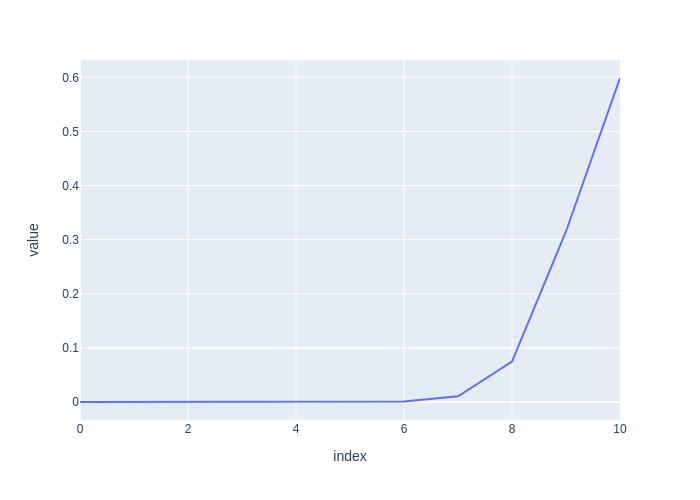
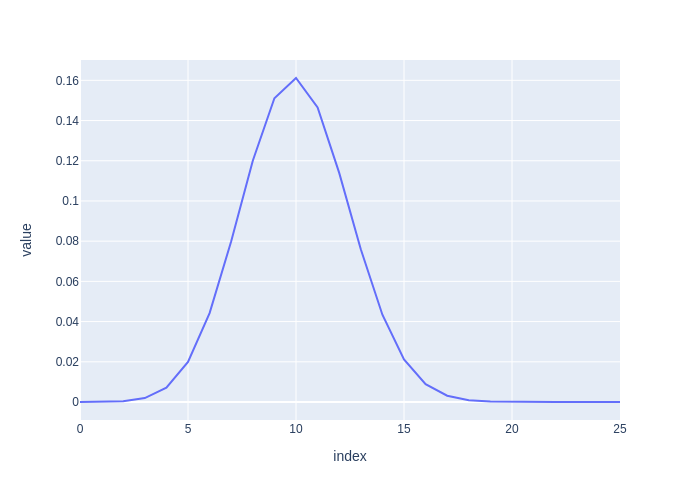
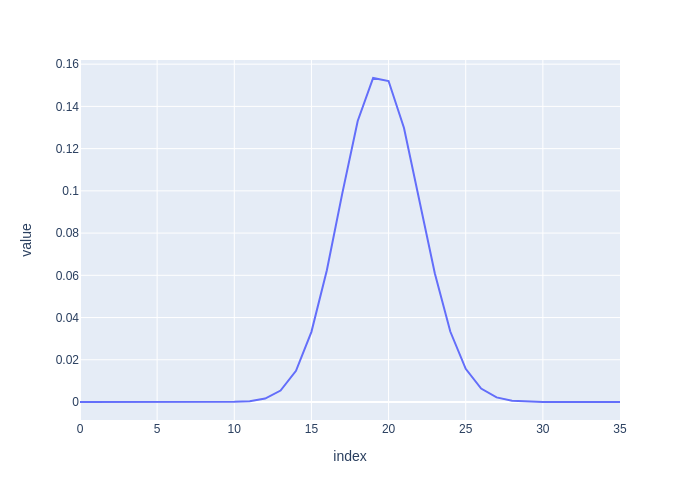

In [3]:
import pyjviz

with pyjviz.CB() as b:
    dist_sensitive = make_binomial(num_sensitive, 0.95).make_plot()
    dist_insensitive = make_binomial(num_insensitive, 0.40).make_plot()
    dist_total = Pmf.add_dist(dist_sensitive, dist_insensitive).make_plot()
    t = pyjviz.Text('add_dist', 'add_dist')
    pyjviz.Arrow(dist_sensitive, t)
    pyjviz.Arrow(dist_insensitive, t)
    pyjviz.Arrow(t, dist_total)
    
pyjviz.show(vertical = True)


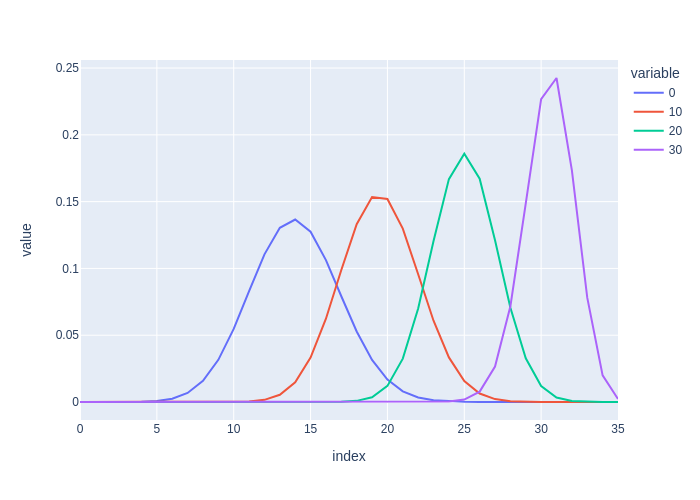

In [4]:
import pandas as pd
with pyjviz.CB():
    table = pd.DataFrame()
    for num_sensitive in range(0, n+1):
        num_insensitive = n - num_sensitive
        dist_sensitive = make_binomial(num_sensitive, 0.95)
        dist_insensitive = make_binomial(num_insensitive, 0.4)
        dist_total = Pmf.add_dist(dist_sensitive, dist_insensitive)    
        table[num_sensitive] = dist_total
        
    table[[0,10,20,30]].make_plot()

pyjviz.show()


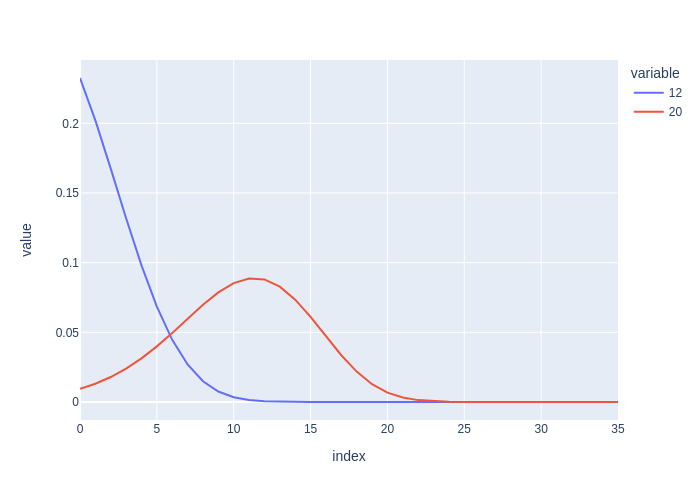

In [5]:
hypos = np.arange(n+1)
prior = Pmf(1, hypos)

with pyjviz.CB():
    posteriors = pd.DataFrame()
    for n in [12, 20]:
        likelihood = table.loc[n]
        posterior = prior * likelihood
        posterior.normalize()
        posteriors[n] = posterior

    posteriors.make_plot()
    
pyjviz.show()